In [88]:
import pandas as pd
import numpy as np 
import csv
from itertools import islice
import matplotlib.pyplot as plt
import os

filepath = "results_example\drosophila_kr\drosoph_kr_status_16503428093686928554.txt"
filepath_sites = "params_example\kr_ts.txt"
#filepath_occup = "/home/al_dente/IdeaProjects/GRiPE/results_example/drosoph_kr_occupancy_17603877883725391617.wig"
sim_id = '17934973361301340786'
proj_path = '/home/al_dente/IdeaProjects/GRiPE'
filepath_tau0_aff = '/home/al_dente/IdeaProjects/GRiPE/results_example/tau0_aff'
filepath_tau0_occ = '/home/al_dente/IdeaProjects/GRiPE/results_example/tau0_occ'
filepath_occ = os.path.join(proj_path, 'results_example', 'drosoph_kr_occupancy_' + sim_id + '.wig')
#filepath_aff = "results_example/drosophila_kr/drosoph_kr_affinity_landscape_5159943198119444638.wig"
filepath_aff = os.path.join(proj_path, 'results_example', 'drosoph_kr_affinity_landscape_' + sim_id + '.wig')

In [2]:
def find_file_segment(path, required):
    with open(path, "r") as file:
        for num_line, line in enumerate(file):
                if required in line:
                    print(line)
                    return(num_line)



In [3]:
required_first = "Cell simulation time:"
required_second = "Elapsed time:"
Start = find_file_segment(filepath,required_first) + 3
End = find_file_segment(filepath,required_second) - 2
print(Start)
print(End)

FileNotFoundError: [Errno 2] No such file or directory: 'results_example\\drosophila_kr\\drosoph_kr_status_16503428093686928554.txt'

: 

In [ ]:
def parse_string(Parametr):
    file = open(filepath, "r")
    list = []
    for i in islice(file, Start, End):
        if "Full update of TF binding propensities" in i:
            continue
        if "bound" in i:
            if Parametr==7 :
                list.append(i.split()[Parametr-1])
                continue
            elif "unbound" in i:
                if Parametr==10:  
                    list.append(i.split()[12])
                    continue
                if Parametr==12:
                    list.append("-")
                    continue
            if Parametr==10:
                list.append(i.split()[Parametr-1])
                continue
        if "hop" in i:
            if "hopped at the same position" in i:
                if Parametr==7:
                    list.append("hop")
                    continue
                if Parametr==10:
                    list.append(i.split()[Parametr+1])
                    continue
                if Parametr==12:
                    list.append("Same pos")
                    continue
            if Parametr==7:
                list.append("hop " + i.split()[Parametr])
                continue
        if "is switching between search and recognition state" in i:
            if Parametr==7:
                list.append("Switch")
                continue
            if Parametr==10:
                list.append(i.split()[8])
                continue
            if Parametr==12:
                list.append(i.split()[25])
                continue
        

                            
            
        list.append(i.split()[Parametr])
    return list

: 

In [ ]:
data = {'Time': parse_string(0), 'Number': parse_string(2), 'Type': parse_string(5), 'Action': parse_string(7), 'Position': parse_string(10), 'Details': parse_string(12)}
df = pd.DataFrame(data)
print(df)

: 

In [ ]:
df.to_pickle (" df.pkl ")

: 

In [ ]:
df.sample(100)

: 

In [ ]:
with open(filepath_sites, "r") as f:
    lines = f.readlines()
with open(filepath_sites, "w") as f:
    for line in lines:
        if "kr" in line:
            f.write(line)

: 

data = pd.read_csv(filepath_occup,  sep=',', usecols = [])
print(data)

In [74]:
kr_size = 11

In [83]:
data_occ_tau0 = pd.read_csv(filepath_tau0_occ, sep=',',skiprows = 1, usecols = [2])[:-kr_size+1]
data_aff_tau0 = pd.read_csv(filepath_tau0_aff, sep=',',skiprows = 1, usecols = [1])[:-kr_size+1]
aff_tau0 = 1 - data_aff_tau0 / data_aff_tau0.max()

In [84]:
data_occ = pd.read_csv(filepath_occ, sep=',',skiprows = 1, usecols = [2])[:-kr_size+1]
data_aff = pd.read_csv(filepath_aff, sep=',',skiprows = 1, usecols = [1])[:-kr_size+1]
aff = 1 - data_aff/ data_aff.max()

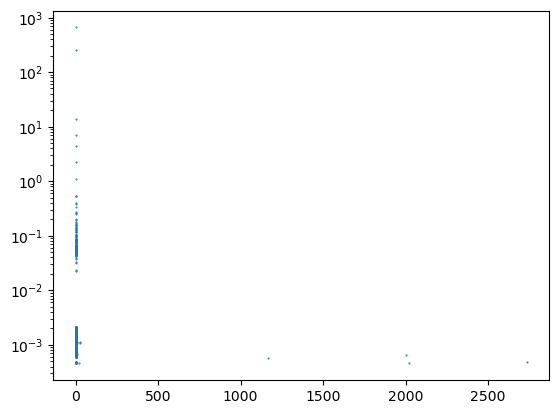

In [96]:
data_coll_count =  pd.read_csv(filepath_occ, sep=',',skiprows = 1, usecols = [1])[:-kr_size+1]
plt.plot(data_coll_count,data_occ, '.', ms =1, lw=0)
plt.yscale('log')

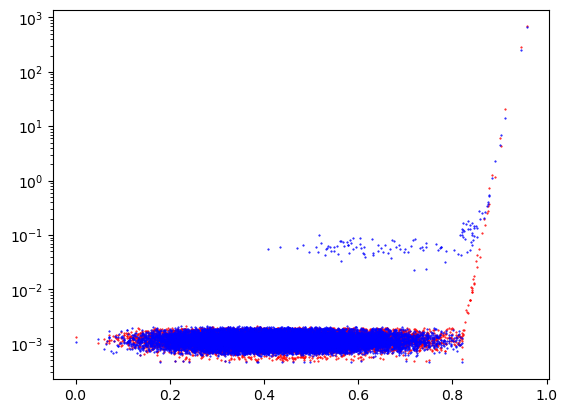

In [85]:
plt.plot(aff_tau0, data_occ_tau0, '.', ms=1, lw=0, color = 'red', label = 'tau0')
plt.plot(aff, data_occ, '.', ms=1, lw=0, color = 'blue', label = 'tau')
plt.yscale('log')

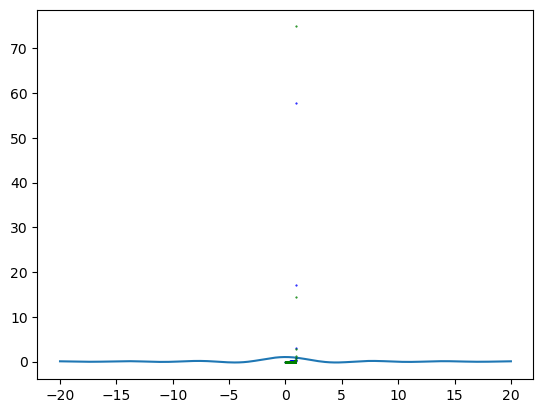

In [61]:
    xmin = -20.0
    xmax = 20.0
    count = 200
x = np.linspace(xmin, xmax, count)
y1 = np.sinc(x / np.pi)
plt.plot(x, y1, label="f(x)")
plt.plot(aff, data_occ, '.', ms=1, lw=0, color = 'blue', label = 'tau')
plt.plot(aff_tau0, data_occ_tau0, '.', ms=1, lw=0, color = 'green', label = 'tau0')
